Use a python module containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

Aquire 

In [1]:
import wrangle
from env import host, user, password
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
url = f'mysql+pymysql://{user}:{password}@{host}iris_db'
from pydataset import data

import env
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from env import host, user, password
import sys
from sklearn.impute import SimpleImputer
import split_scale
import explore
import acquire


In [2]:
df_iris= data('iris')

print the first 3 rows
print the number of rows and columns (shape)
print the column names
print the data type of each column
print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [3]:
df_iris= wrangle.wrangle_iris()

   measurement_id  sepal_length  sepal_width  petal_length  petal_width  \
0               1           5.1          3.5           1.4          0.2   
1               2           4.9          3.0           1.4          0.2   
2               3           4.7          3.2           1.3          0.2   

   species_id  species_id species_name  
0           1           1       setosa  
1           1           1       setosa  
2           1           1       setosa  
(150, 8)
Index(['measurement_id', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species_id', 'species_id', 'species_name'],
      dtype='object')
measurement_id      int64
sepal_length      float64
sepal_width       float64
petal_length      float64
petal_width       float64
species_id          int64
species_id          int64
species_name       object
dtype: object
       measurement_id  sepal_length  sepal_width  petal_length  petal_width  \
count      150.000000    150.000000   150.000000    150.000000  

2. Read Table1_CustDetails the excel module dataset, Excel_Exercises.xlsx, into a dataframe, df_excel

In [22]:
df_excel= wrangle.excel_reader()

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')
customer_id         object
gender              object
partner             object
dependents          object
payment_type        object
churn               object
Contract Type       object
Phone Service       object
Internet service    object
dtype: object
     is_senior_citizen  phone_service  internet_service  contract_type  \
min                0.0            0.0               0.0            0.0   
max                1.0            2.0               2.0            2.0   

     monthly_charges  total_charges  Tenure (months)  partners_dependants   \
min            18.25           18.8              0.0                   0.0   
max           118.75         8684.8             79.0                   3.0   

     Average monthly charges  
min                     15.6  
max                    121.4  


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 

In [23]:
print(df_excel[num_cols].max()-df_excel[num_cols].min())

NameError: name 'num_cols' is not defined

In [7]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
df_google.shape

(891, 12)

In [10]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
for col in df_google:
    if df_google[col].dtype=='O':
       print(df_google[col].value_counts()[0:5])

Davies, Mr. Alfred J                1
O'Connor, Mr. Maurice               1
Alexander, Mr. William              1
Sawyer, Mr. Frederick Charles       1
Holm, Mr. John Fredrik Alexander    1
Name: Name, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
CA. 2343    7
1601        7
347082      7
3101295     6
347088      6
Name: Ticket, dtype: int64
C23 C25 C27    4
B96 B98        4
G6             4
E101           3
C22 C26        3
Name: Cabin, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


Iris Data base


In [31]:
from pydataset import data

iris = data('iris')
iris
print(iris.head(3))
df = iris

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa


In [33]:
train_df, test_df = split_scale.train_test_split(
    df, test_size=.30, random_state=123)

train_df.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

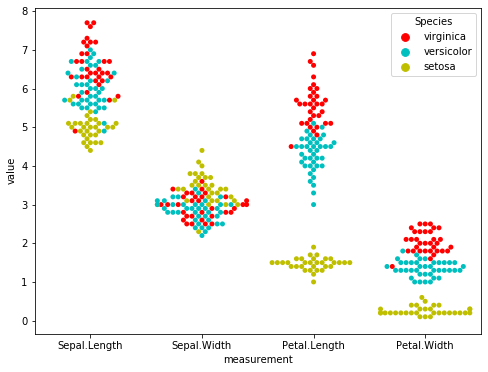

In [34]:
df_melt = pd.melt(train_df[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species']], "Species", var_name="measurement")
plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
p = sns.swarmplot(x="measurement", y="value", hue="Species",
              palette=["r", "c", "y"], data=df_melt)
# p.set(yscale="log")
plt.show()

Create 4 subplots (2 rows x 2 columns) of scatterplots¶
sepal_length x sepal_width
petal_length x petal_width
sepal_area x petal_area
sepal_length x petal_length
Make your figure size 14 x 8. What are your takeaways?

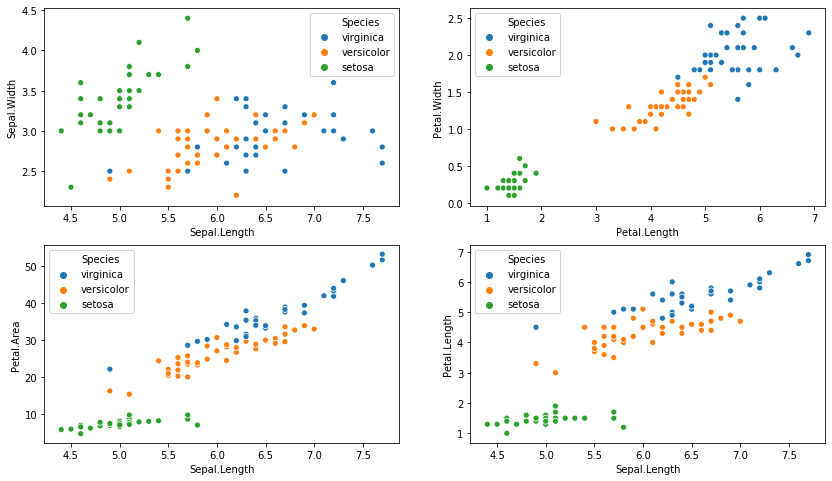

In [35]:
train_df['Sepal.Area'] = train_df['Sepal.Width'] * train_df['Sepal.Length']
train_df['Petal.Area'] = train_df['Petal.Length'] * train_df['Sepal.Length']
train_df.head()
import numpy as np
ax = plt.subplots(nrows=2, ncols=2, figsize=(14,8))[1]

sns.scatterplot('Sepal.Length', 'Sepal.Width', hue='Species', data=train_df, ax=ax[0][0])
sns.scatterplot('Petal.Length', 'Petal.Width', hue='Species', data=train_df, ax=ax[0][1])
sns.scatterplot('Sepal.Length', 'Petal.Area', hue='Species', data=train_df, ax=ax[1][0])
sns.scatterplot('Sepal.Length', 'Petal.Length', hue='Species', data=train_df, ax=ax[1][1])

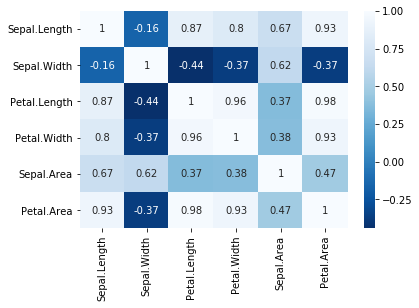

In [37]:
#Create a heatmap of each variable layering correlation coefficient on top.
sns.heatmap(train_df.corr(),annot=True,cmap='Blues_r')

H0: the difference in sepal length between virginica and versicolor is insignificant.


Ha: the difference in sepal length between virginica and versicolor is significant.

In [38]:
import scipy as sp 
import numpy as np

sp.stats.ttest_ind(
    train_df[train_df['Species'] == 'virginica']['Sepal.Length'].dropna(),
    train_df[train_df['Species'] == 'versicolor']['Sepal.Length'].dropna())

Ttest_indResult(statistic=4.232219188580116, pvalue=6.811720108343317e-05)

In [39]:
###We reject the null hypothesis